In [16]:
#導入套件
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #中文字型

In [32]:
#交通部的台灣出國旅遊資料，資料區間為 2001-2019 的月資料
df = pd.read_csv('108結婚對數2.csv')
df.head(156)

,date,County,value
0,19-Jan,桃園區,305
1,19-Feb,桃園區,202
2,19-Mar,桃園區,240
3,19-Apr,桃園區,177
4,19-May,桃園區,272
...,...,...,...
151,19-Aug,復興區,5
152,19-Sep,復興區,8
153,19-Oct,復興區,6
154,19-Nov,復興區,7


<BarContainer object of 5 artists>

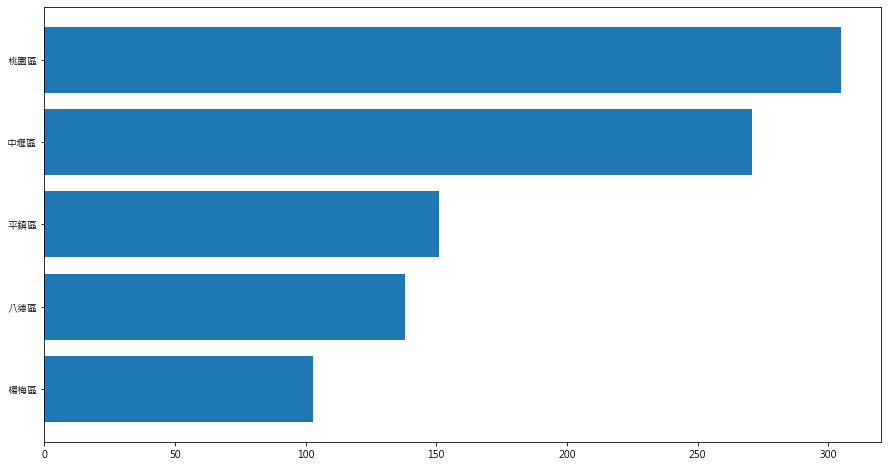

In [42]:
#畫出原始的長條圖
basic = df[df['date']=='19-Jan'].sort_values('value').tail()
fig, ax = plt.subplots(figsize=(15, 8)) # 在同一個視窗繪製多個圖表
ax.barh(basic['County'], basic['value']) #繪製水平條形圖

In [43]:
#設定一個dict，將國家名稱和色碼對應再一起即可
colors = dict(zip(
    ["桃園區", "中壢區", "大溪區", "楊梅區", "蘆竹區", "大園區", "龜山區","八德區","龍潭區","平鎮區","新屋區","觀音區","復興區"],
    ["#2E86AB", "#424B54", "#00A6A6", "#F24236", "#9E643C", "#f7bb5f", "#EDE6F2","#E9D985", "#8C4843", "#90d595", "#e48381", "#090446", "#f7bb5f"]
))

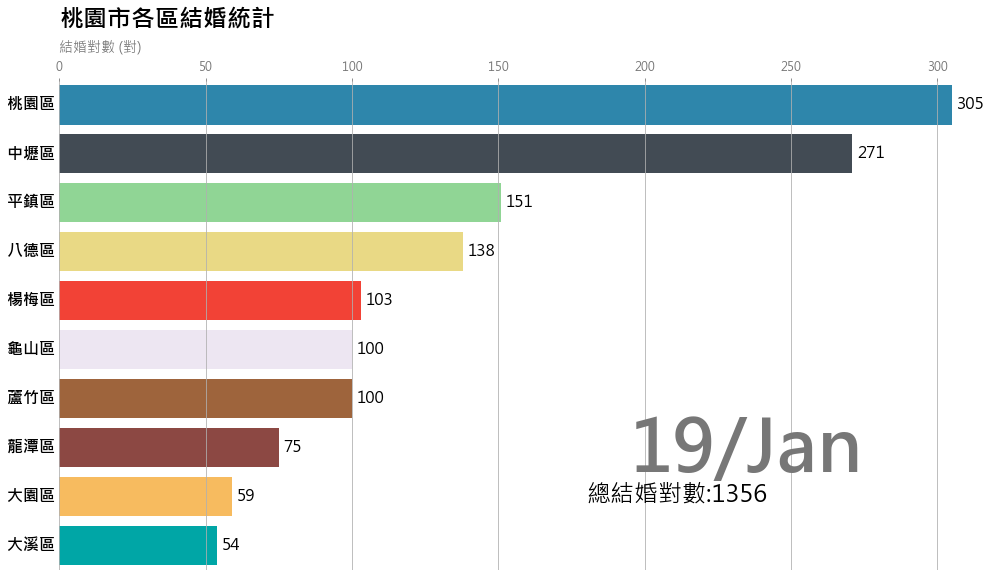

In [48]:

fig, ax = plt.subplots(figsize=(16, 9))

def race_barchart(input_year):
    dff = df[df['date'].eq(input_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()

    ax.barh(dff['County'], dff['value'], color=[colors[x] for x in dff['County']],height=0.8)
    dx = dff['value'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['value'], dff['County'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center')
        ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center')
            
    ax.text(0.9, 0.2, input_year[:7].replace('-','/'), transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000)
    ax.text(0, 1.06, '結婚對數 (對)', transform=ax.transAxes, size=14, color='#777777')
    ax.text(0.59, 0.14, '總結婚對數:'+str(int(dff['value'].sum())), transform=ax.transAxes, size=24, color='#000000',ha='left')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.xaxis.set_ticks_position('top')
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.text(0, 1.15, '桃園市各區結婚統計',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top')

    plt.box(False)
    
race_barchart('19-Jan')

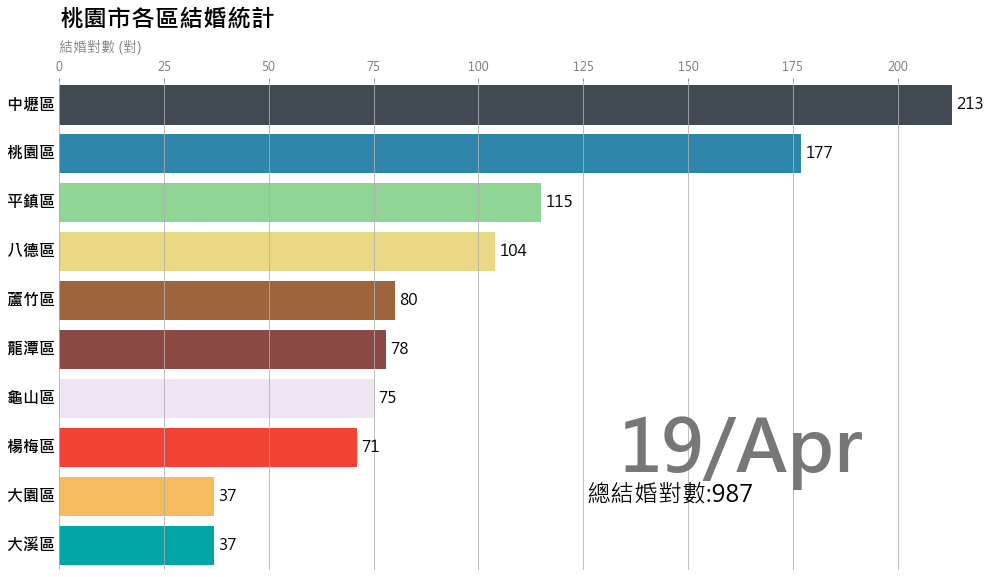

In [49]:
#轉成動畫:利用FunAnimation來完成，是利用反覆呼叫我們設定的畫圖函式，來完成一張又一張的圖片，然後再結合起來變成動畫
#就以本次例子來說共有三個參數，fig為初始設置畫布、race_barchart為我們設定的函式，frames則為丟進該函式的值
#整理Frame月資料
from matplotlib.animation import FuncAnimation
month = list(set(df.date.values))
month.sort()

fig, ax = plt.subplots(figsize=(16, 9))
animator = animation.FuncAnimation(fig, race_barchart, frames=month)
HTML(animator.to_jshtml())



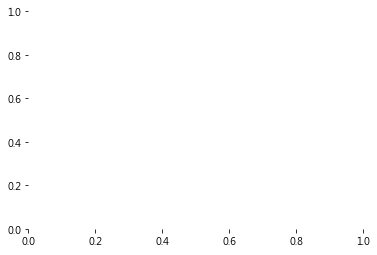

In [51]:
!pip install pillow
animator.save('C:\\108桃園結婚對數.gif', writer='pillow')